In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
%matplotlib inline 
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

2021-10-20 09:47:25.130129: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-20 09:47:25.130230: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
def load_data():
    train_data = pd.read_csv("training.csv")
    test_data = pd.read_csv("test.csv")
    return train_data, test_data

In [4]:
train_data, test_data  = load_data()

In [5]:
train_data_images = train_data['Image'].to_numpy()

# train_data_images = np.array(train_data['Image'].values, dtype=np.float32)

In [6]:
train_final_data = np.zeros((train_data_images.shape[0], 96, 96, 1))
# pritrain_final_data.shape
for i in range(0, train_data_images.shape[0]):
    train_final_data[i] = np.reshape(np.fromstring(train_data_images[i], dtype=int, sep=" "), (96,96,1))

In [7]:
def show_image_from_number(number):    
    data = np.reshape(np.array(train_data['Image'][number].split(), dtype=np.uint8), (96,96,1))
    print(data.shape)
    plt.imshow(data, interpolation='nearest')
    plt.show()

In [8]:
def pre_process_data(input_data, is_train=False):
    df = input_data.copy()
    if is_train:
        df = df.drop('Image', axis=1)
    df = df.apply(lambda x: x.fillna(x.mean()),axis=1)
    df = np.reshape(np.array(df.values), (df.shape[0], 30))
    return df
    

In [9]:
processed_data = pre_process_data(train_data, True)

In [21]:
rgb_scales = tf.image.grayscale_to_rgb(tf.convert_to_tensor(train_final_data[0:1000, :, :, :]))

In [26]:
rgb_scales.shape
train_X, test_X, train_Y, test_Y = train_test_split(rgb_scales.numpy(),
                                                    processed_data[0:1000, :],
                                                    test_size=0.02,
                                                    random_state=42)

In [16]:
input_shape = (96,96,3)
base_model = tf.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
base_model.trainable=False
flatten = Flatten()
dense_output = Dense(30)
dropout_layer = Dropout(0.2)
final_model = Model(base_model.input, dense_output(flatten(dropout_layer(base_model.output))))
final_model.summary()

final_model.compile(optimizer = tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError(), metrics=['mse'])

    

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 102, 102, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 48, 48, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 48, 48, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [27]:
final_model.fit(train_X, train_Y, epochs=50)
final_model.evaluate(test_X, test_Y)

2021-10-20 10:01:00.104083: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-20 10:01:00.164435: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2700905000 Hz


Epoch 1/50
31/31 [==============================] - 19s 487ms/step - loss: 346.1811 - mse: 346.1811
Epoch 2/50
31/31 [==============================] - 15s 478ms/step - loss: 31.7006 - mse: 31.7006
Epoch 3/50
31/31 [==============================] - 17s 549ms/step - loss: 15.4229 - mse: 15.4229
Epoch 4/50
31/31 [==============================] - 16s 519ms/step - loss: 12.0657 - mse: 12.0657
Epoch 5/50
31/31 [==============================] - 17s 542ms/step - loss: 10.0036 - mse: 10.0036
Epoch 6/50
31/31 [==============================] - 17s 544ms/step - loss: 8.7990 - mse: 8.7990
Epoch 7/50
31/31 [==============================] - 16s 516ms/step - loss: 8.1861 - mse: 8.1861
Epoch 8/50
31/31 [==============================] - 17s 546ms/step - loss: 7.3771 - mse: 7.3771
Epoch 9/50
31/31 [==============================] - 17s 541ms/step - loss: 6.7880 - mse: 6.7880
Epoch 10/50
31/31 [==============================] - 17s 548ms/step - loss: 6.2958 - mse: 6.2958
Epoch 11/50
31/31 [========

[3.773014545440674, 3.773014545440674]

In [28]:
import cv2

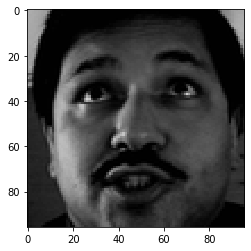

In [57]:

features_loc = final_model.predict(test_X)[15]
image = np.array(test_X[15], dtype=np.uint8)
# image
plt.imshow(image, interpolation='nearest')
for i in range(0,len(features_loc),2):
    x = features_loc[i]
    y = features_loc[i+1]
    
    cv2.circle(image, (int(x), int(y)), radius=1, color=(0, 0, 255), thickness=-1)


    

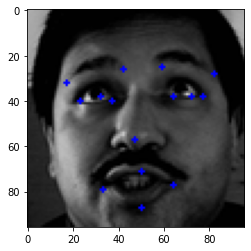

In [58]:
plt.imshow(image,cmap='gray')

In [59]:
test_data.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [63]:
test_data_images = test_data['Image'].to_numpy()
test_data_images.shape
test_final_data = np.zeros((test_data_images.shape[0], 96, 96, 1))
# pritrain_final_data.shape
for i in range(0, test_data_images.shape[0]):
    test_final_data[i] = np.reshape(np.fromstring(test_data_images[i], dtype=int, sep=" "), (96,96,1))

test_d = tf.image.grayscale_to_rgb(tf.convert_to_tensor(test_final_data))

2021-10-20 10:43:49.118462: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 394371072 exceeds 10% of free system memory.


In [64]:
predictions = final_model.predict(test_d)

In [99]:
predictions.shape
# col = list(train_data.columns)
# col = col[:-1]

# x2 = list(range(1, predictions.shape[0] + 1)) * 30
# x2.sort()


(1783, 30)

In [100]:
fx = np.array(predictions).ravel()
final_data = {'RowId': list(range(1, len(fx) + 1)), 'Location':fx}
submit_df = pd.DataFrame(final_data)
submit_df.to_csv("submission.csv", index=False)
